Demo using fake data

In [1]:
%matplotlib inline
from __future__ import division, print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import query_wise_mask

In [2]:
# Create fake data
ramin, ramax = 134., 139.
decmin, decmax = 11., 16.
ra = np.random.uniform(ramin, ramax, int(1e5))
dec = np.random.uniform(decmin, decmax, int(1e5))

In [3]:
# Obtain WISE mask value at each location
mask_value = query_wise_mask.query_mask_value(ra, dec)

Finding the nearest coadd
0%
10%
19%
29%
38%
48%
57%
67%
76%
86%
95%
95361 (95.4%) objects inside the nearest coadd

Finding the second nearest coadd
0%
8%
17%
25%
33%
42%
50%
58%
67%
75%
83%
92%
11402 (11.4%) objects inside the second nearest coadd

Finding the third nearest coadd
0%
8%
15%
23%
31%
38%
46%
54%
62%
69%
77%
85%
92%
1104 (1.1%) objects inside the third nearest coadd

88539 (88.5%) objects only inside the nearest coadd
3892 (3.9%) objects only inside the second nearest coadd
0 (0.0%) objects only inside the third nearest coadd

93484 (93.5%) objects belong to the nearest coadd
6516 (6.5%) objects belong to the second nearest coadd
0 (0.0%) objects belong to the third nearest coadd

Obtaining mask values from images
0%
10%
19%
29%
38%
48%
57%
67%
76%
86%
95%


---------
## Verify

In [4]:
# Obtain intermediate values
coadd_idx, pixcrd_x, pixcrd_y = query_wise_mask.query_wise_coadd(ra, dec, verbose=False)

# Load coadd table
coadd = Table.read(query_wise_mask.coadd_fn)

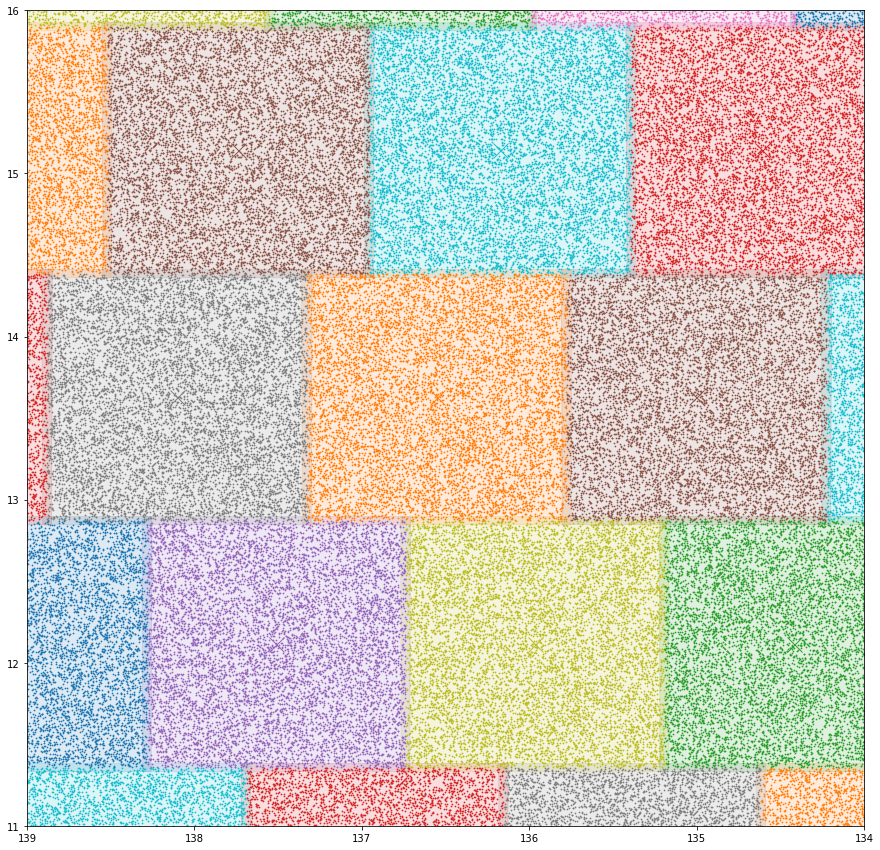

In [5]:
color_index = 0
patches = []
colors =[]
fig, ax = plt.subplots(figsize=(15, 15))
for index in range(len(coadd)):
    if (ramin-3<coadd['ra_center'][index]<ramax+3) and (decmin-2<coadd['dec_center'][index]<decmax+2):
        polygon = Polygon(
            np.stack((coadd['ra_corners'][index], 
                      coadd['dec_corners'][index])).transpose(),
                      True)
        patches.append(polygon)
        colors.append('C{}'.format(color_index%10))
        plt.plot(coadd['ra_center'][index], coadd['dec_center'][index], 'C{}x'.format(color_index%10), markersize=15)
        mask = (coadd_idx==index)
        plt.plot(ra[mask], dec[mask], 'C{}.'.format(color_index%10), markersize=1.5)
        color_index += 1
p = PatchCollection(patches, alpha=0.15)
p.set_color(colors)
ax.add_collection(p)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()

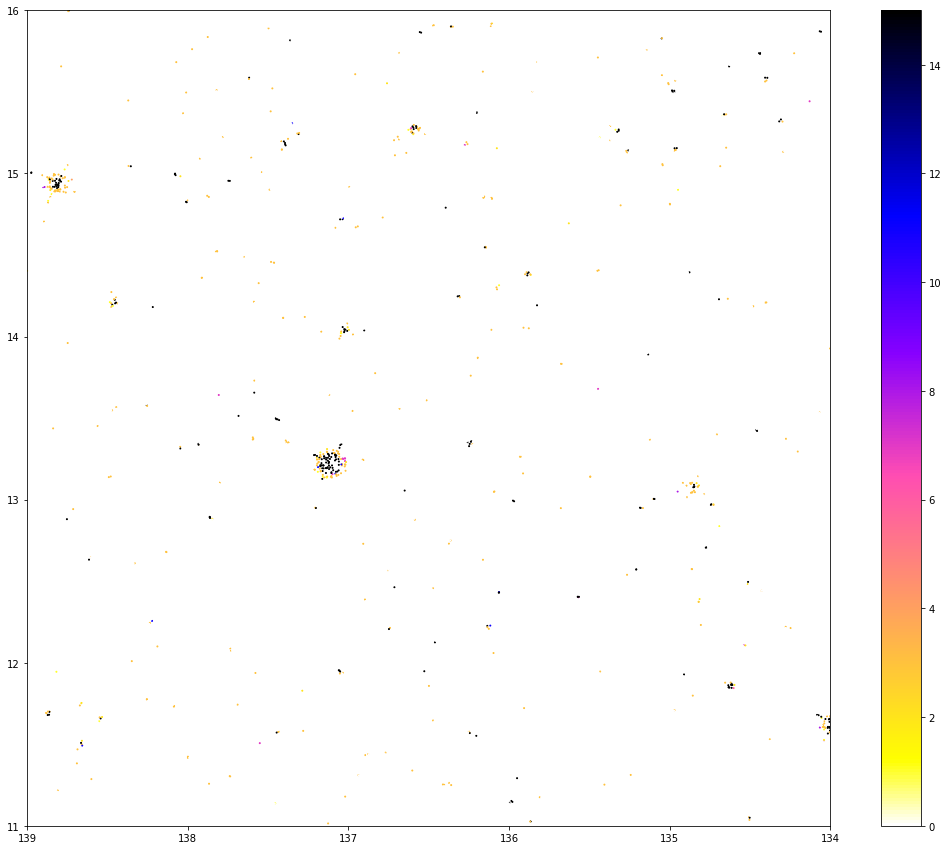

In [6]:
fig, ax = plt.subplots(figsize=(18, 15))
# ax.set_facecolor('black')
im = ax.scatter(ra, dec, c=mask_value, cmap='gnuplot2_r', s=1, edgecolors=None)
fig.colorbar(im, ax=ax)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()